<h1 style="color:blue;">SALES PREDICTION USING PYTHON</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Loading dataset</h3>

In [2]:
df=pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<h3>Understanding dataset</h3>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<h3>Preprocessing the data</h3>

In [6]:
x=df.drop(columns=['Sales'])
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [7]:
y=df.Sales
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

<h3>visualization of  dataset</h3>

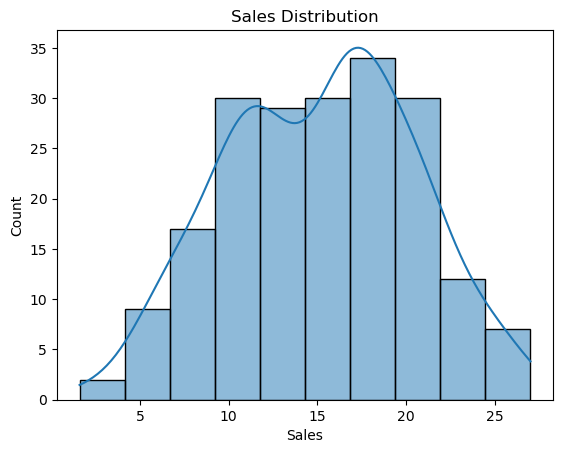

In [25]:
sns.histplot(df['Sales'], kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.show()

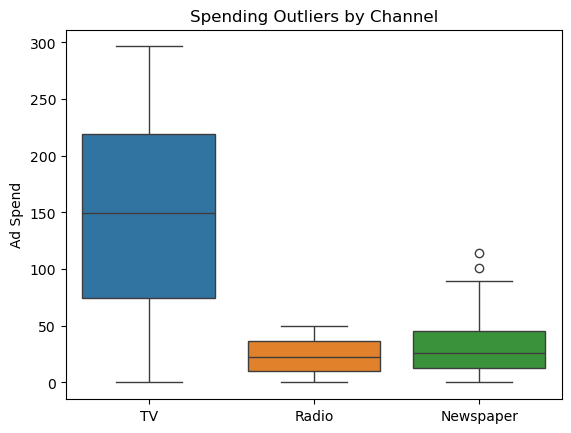

In [26]:
sns.boxplot(data=df[['TV', 'Radio', 'Newspaper']])
plt.title("Spending Outliers by Channel")
plt.ylabel("Ad Spend")
plt.show()

<h4>Spliting data into train and test dataset</h4>

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1,random_state=23)

<h3>Model training</h3>

<h4>Random Forest Regressor</h4

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
model=RandomForestRegressor(n_estimators=100, random_state=23)
model.fit(x_train,y_train)


RandomForestRegressor(random_state=23)

In [12]:

model.score(x_train,y_train)

0.9928974233604886

In [13]:
y_pred=model.predict(x_test).astype(int)
y_pred

array([ 8, 19, 18, 13, 18,  7, 19, 16, 24, 16, 22, 10, 11, 17, 11, 18, 15,
       10, 18, 11])

In [16]:
df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


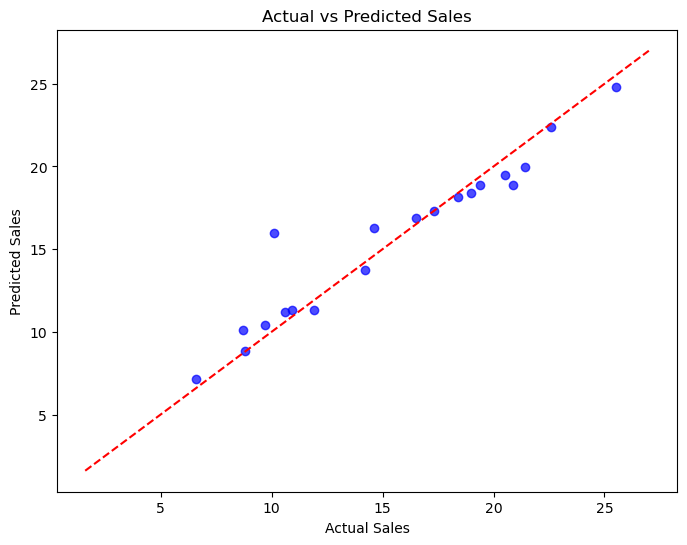

In [20]:
y_pred = model.predict(x_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


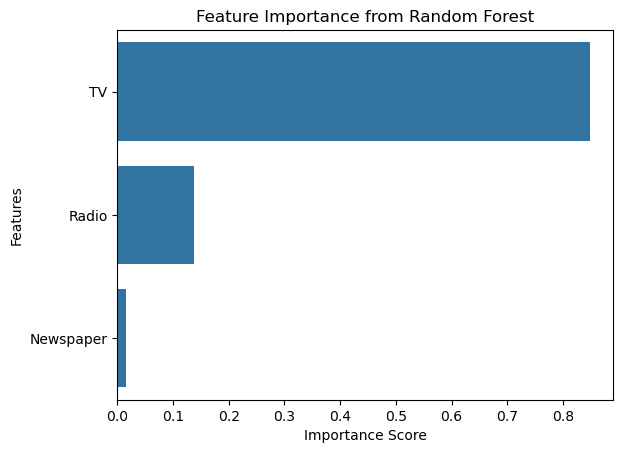

In [22]:
importance = model.feature_importances_
features = x.columns
sns.barplot(x=importance, y=features)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

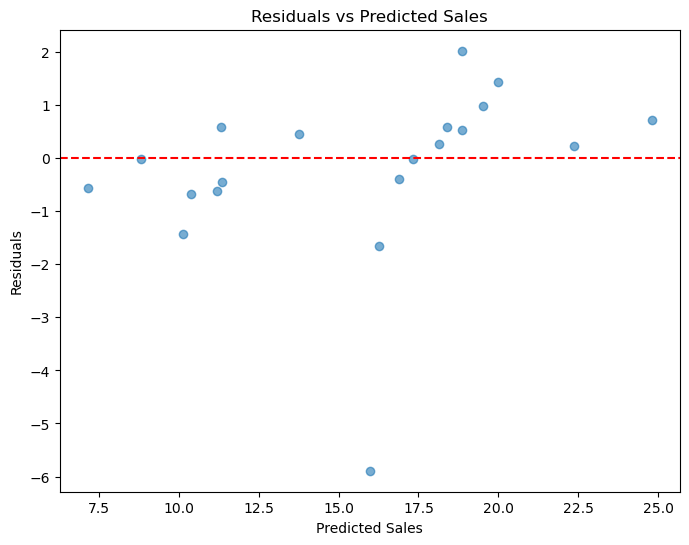

In [23]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales")
plt.show()

<h3>Model Accuracy</h3>

In [ ]:
Accuracy=model.score(x_test,y_test)

In [ ]:
print(f"The model achieved {Accuracy*100} % accuracy on the test set.")